In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
leaf1=pd.read_csv('C:/Users/HP/Downloads/leaf.csv')

In [3]:
x= leaf1.iloc[:, :-1].values  
x

array([[0.00000000e+00, 1.87605200e+06, 5.54400000e+03, ...,
        9.98399840e-01, 8.71316669e-01, 7.01788557e+00],
       [0.00000000e+00, 1.75090500e+06, 5.38800000e+03, ...,
        9.97333115e-01, 8.69411584e-01, 6.89946773e+00],
       [0.00000000e+00, 1.74930600e+06, 5.38600000e+03, ...,
        9.96869442e-01, 9.10523752e-01, 6.11017524e+00],
       ...,
       [0.00000000e+00, 1.14968100e+06, 4.63600000e+03, ...,
        9.97696589e-01, 9.30295839e-01, 5.58019037e+00],
       [0.00000000e+00, 1.14968100e+06, 4.63600000e+03, ...,
        9.97490457e-01, 9.41047543e-01, 5.28799833e+00],
       [0.00000000e+00, 1.14968100e+06, 4.63600000e+03, ...,
        9.96144108e-01, 9.36064173e-01, 4.88929470e+00]])

In [4]:
y= leaf1.iloc[:, 18].values  
y

array(['Alari', 'Alari', 'Alari', ..., 'White Karisalankani',
       'White Karisalankani', 'White Karisalankani'], dtype=object)

In [5]:
#from sklearn import preprocessing 
# label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'.
#y= label_encoder.fit_transform(y)
#y

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators = 10, random_state = 0)
forest.fit(X_train,y_train);

In [9]:
y_pred = forest.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 9  1  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  5]]
0.7888888888888889


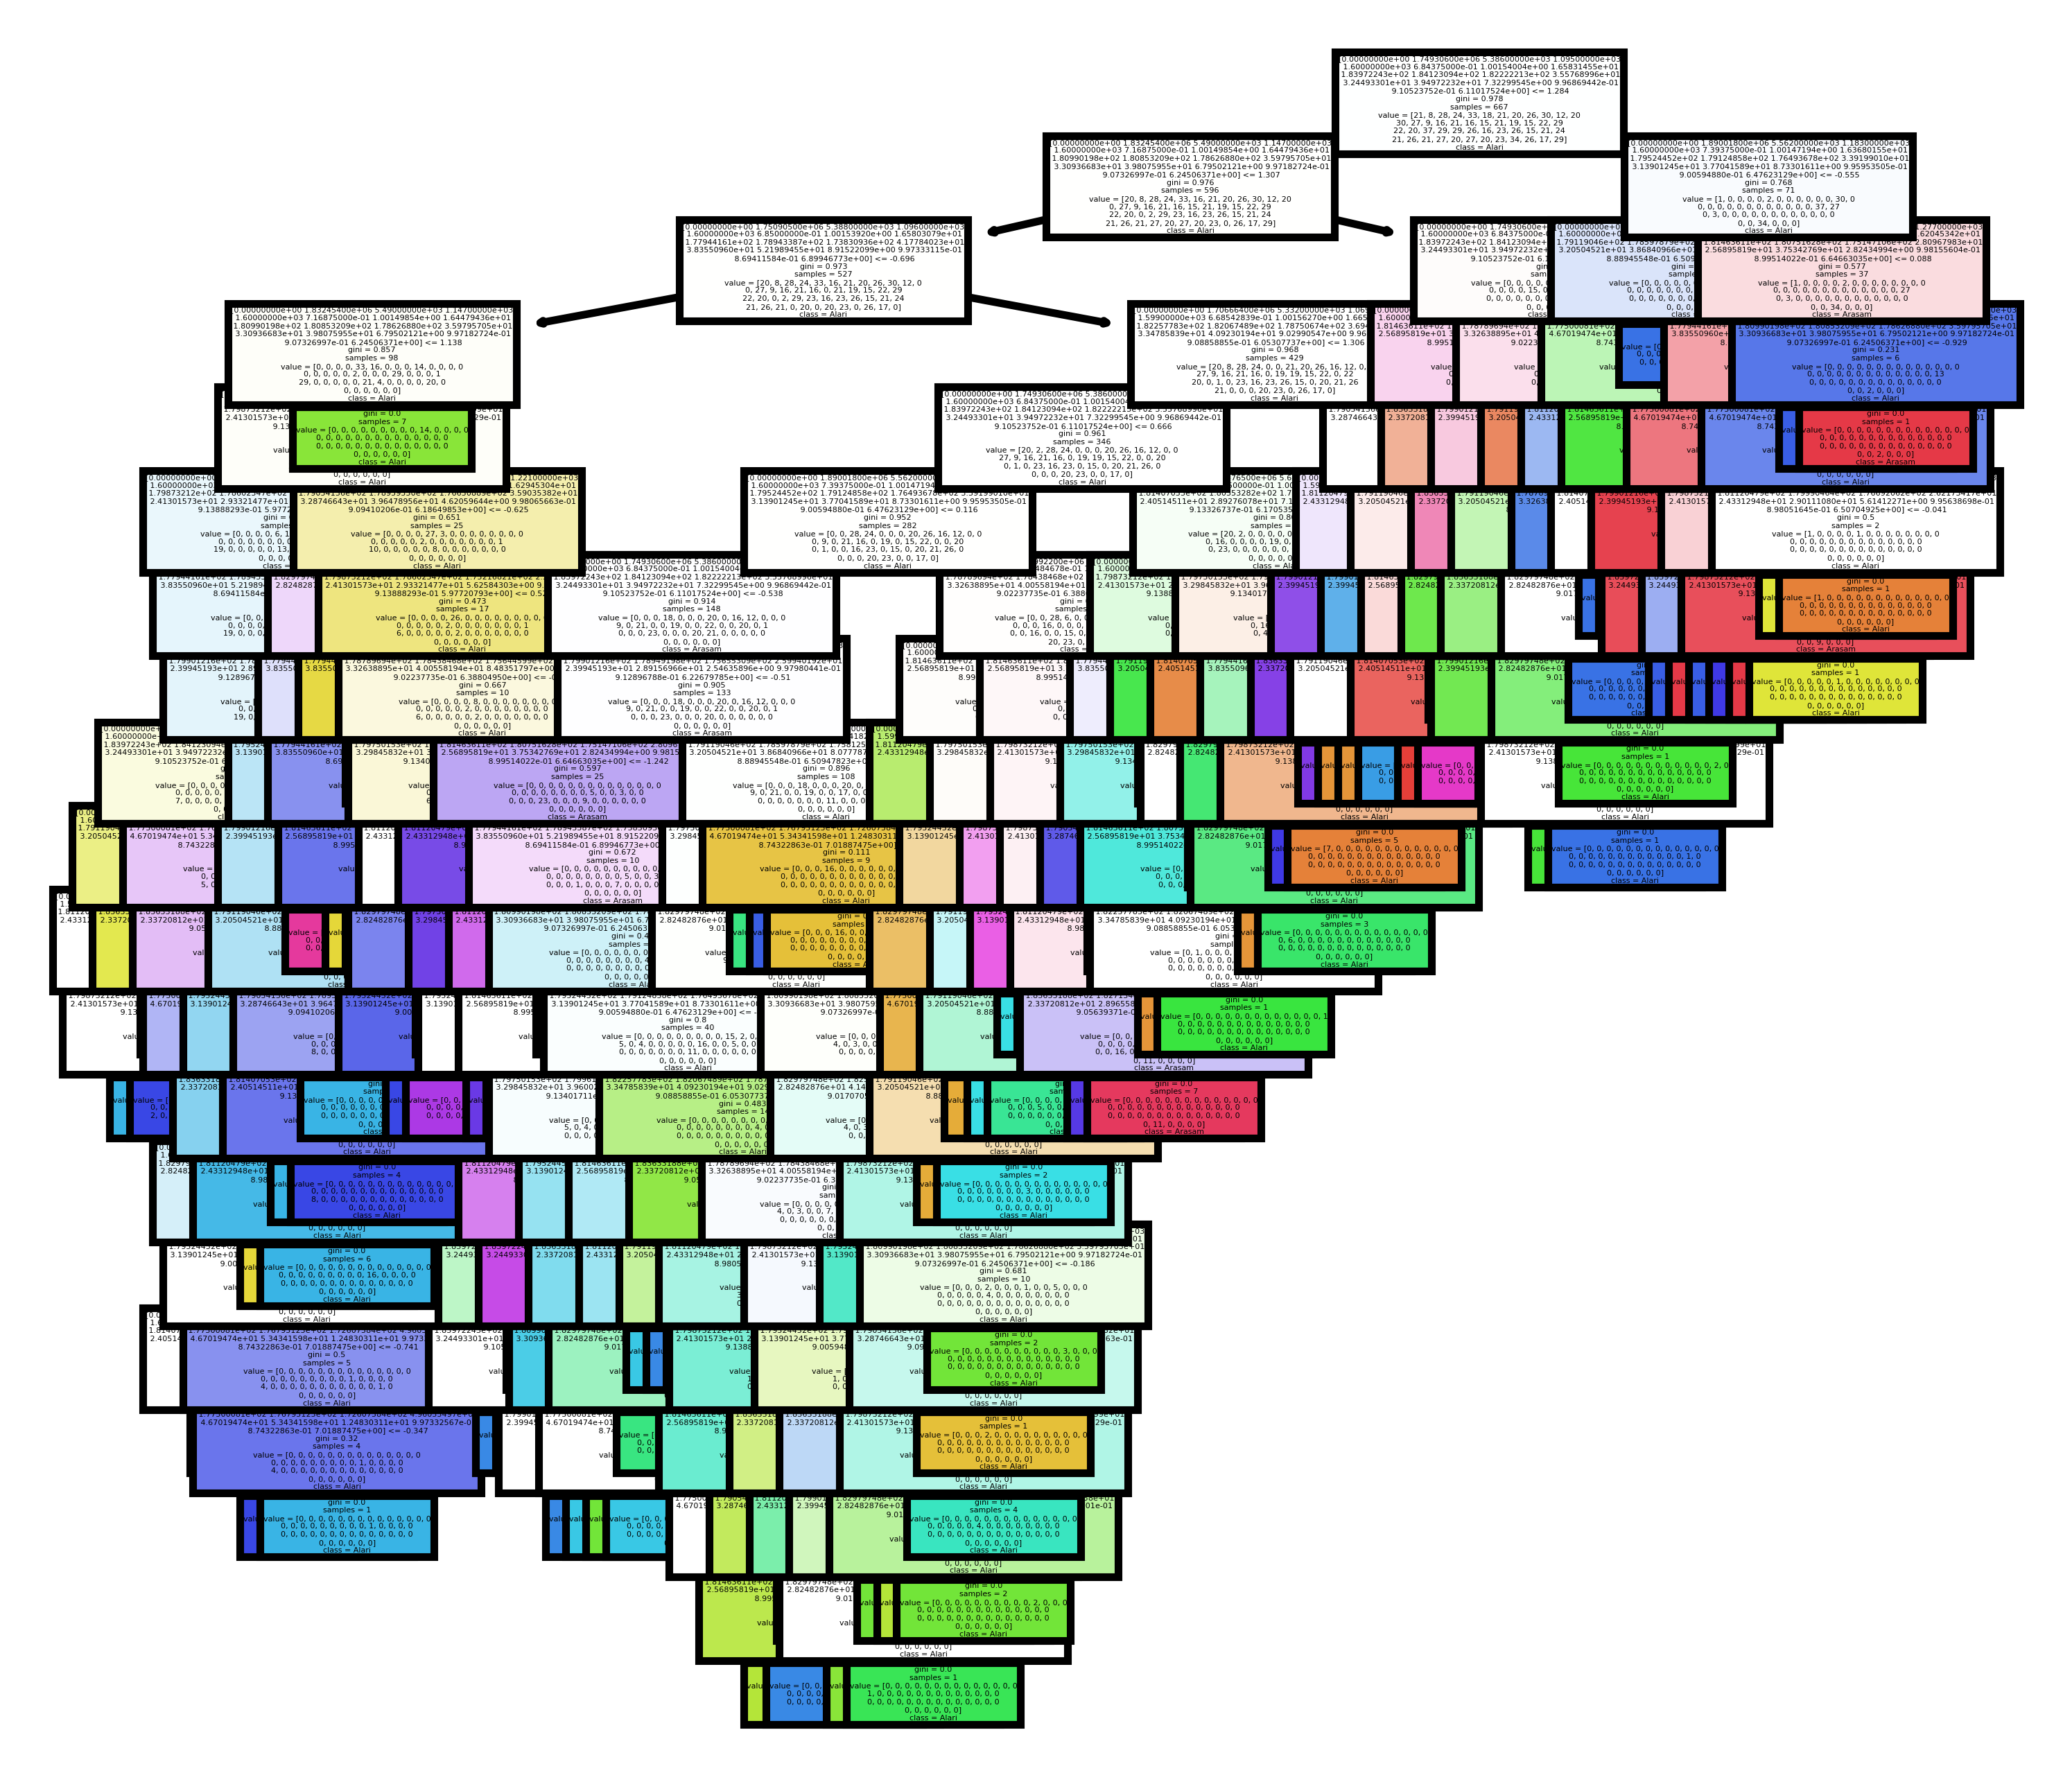

In [11]:
from sklearn import tree
fn=x
cn=y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(forest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')